Index Number : AS2019480

CSC 369 2.0 Machine Learning I - Assignment



In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn import neighbors, metrics

Importing packages that are needed

In [62]:
data = pd.read_csv('Mobile_Dataset.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Importing the dataset that was given

In [63]:
data.info
pd.DataFrame(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

""


Printing information about the dataset.

In [64]:
pd.DataFrame(data.price_range.value_counts())

,price_range
1,500
2,500
3,500
0,500


Counting how many data entries fall under each category of the label 'price_range'. Because they are equal, the dataset is balanced. 

In [65]:
pd.DataFrame(data.dtypes)

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


Printing the data types to check for boolean values. 

### Preprocessing the Dataset

In [66]:
from sklearn.preprocessing import StandardScaler
scalerSS = StandardScaler()
scalerSS.fit(data.drop('price_range',axis=1))
normData = pd.DataFrame(scalerSS.transform(data.drop('price_range',axis=1)))
pd.DataFrame(normData)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


Because a K-nearest neghbor model is used, the scales of the axes play a bigger role in the final result. Therefore, to bring all axes to the same scale, the StandardScaler is used for Normalization.

Text(0, 0.5, 'y')

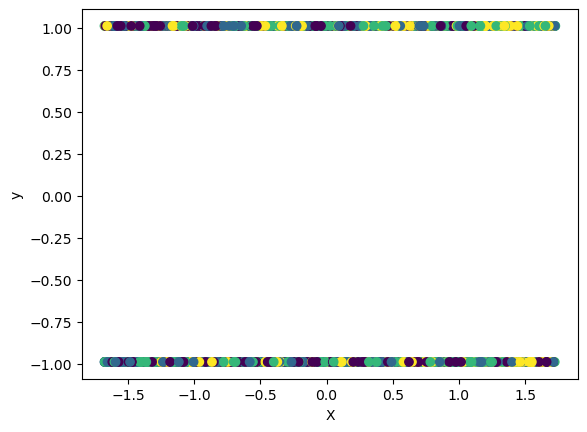

In [67]:
x = normData.values
y = data['price_range']
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('X')
plt.ylabel('y')

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

Splitting the dataset such that the Test Dataset is 20% of the orginal dataset.

### Using K-Nearest Neighbor

#### Addressing Overfitting

In [69]:
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train,y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))


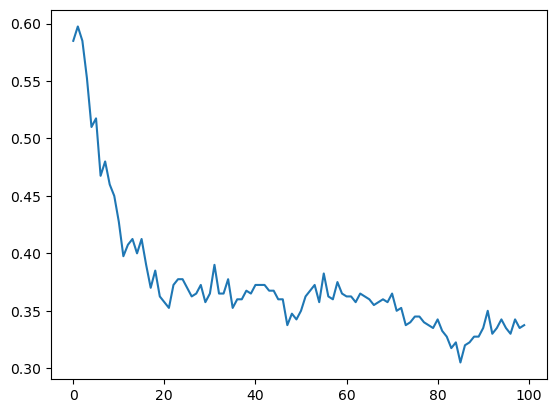

In [70]:
plt.plot(error_rates)

Finding the best value for k in order to reduce overfitting

In [71]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors = i), 
             param_grid={'n_neighbors': np.arange(1, 101)}, cv=3)

Performing 3 cross validations for the dataset to find most effective value of k

In [72]:
mod.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=100),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [73]:
results = pd.DataFrame(mod.cv_results_)
pd.DataFrame(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015626,0.012760,0.364617,0.007317,1,{'n_neighbors': 1},0.471910,0.450281,0.442777,0.454989,0.012351,98
1,0.000000,0.000000,0.354140,0.007365,2,{'n_neighbors': 2},0.441948,0.431520,0.437148,0.436872,0.004262,100
2,0.000000,0.000000,0.351559,0.011078,3,{'n_neighbors': 3},0.458801,0.465291,0.429644,0.451245,0.015503,99
3,0.005208,0.007366,0.359348,0.000002,4,{'n_neighbors': 4},0.477528,0.514071,0.478424,0.490008,0.017019,97
4,0.000000,0.000000,0.374974,0.022097,5,{'n_neighbors': 5},0.494382,0.514071,0.502814,0.503756,0.008066,96
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.406222,0.000004,96,{'n_neighbors': 96},0.612360,0.658537,0.662289,0.644395,0.022704,10
96,0.000000,0.000000,0.406221,0.022091,97,{'n_neighbors': 97},0.627341,0.658537,0.666041,0.650640,0.016757,3
97,0.010416,0.007365,0.385387,0.007364,98,{'n_neighbors': 98},0.627341,0.645403,0.667917,0.646887,0.016599,6
98,0.005208,0.007365,0.406220,0.022091,99,{'n_neighbors': 99},0.631086,0.649156,0.675422,0.651888,0.018203,1


Cross Validation Results of the model

#### Training and Predicting with the Model

In [74]:

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
model = KNeighborsClassifier(n_neighbors=99)
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=99)

Importing the K-Nearest Neighbors Classifier model and training it with the Training Dataset

In [75]:
preds = model.predict(X_test)

In [76]:
preds

array([1, 1, 2, 1, 1, 1, 3, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1,
       3, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 2, 2, 3,
       3, 0, 2, 3, 3, 1, 0, 0, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 3, 2, 3, 3, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2,
       0, 0, 3, 2, 0, 3, 0, 3, 2, 0, 1, 3, 0, 2, 3, 2, 0, 3, 0, 0, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 3, 0, 0, 3, 2, 1, 3, 1, 3, 3, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 3, 0, 1, 3, 1, 3, 0, 0, 0, 1, 1, 1, 3, 0, 2, 0, 2, 1,
       3, 3, 2, 0, 3, 2, 2, 1, 3, 1, 1, 1, 2, 1, 3, 3, 0, 1, 0, 3, 1, 3,
       2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 3, 1, 0, 2, 1, 0, 3, 0, 0,
       3, 0, 1, 0, 3, 2, 1, 3, 0, 2, 3, 2, 1, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       0, 1, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 2, 0, 3, 0, 2, 1, 0, 1, 3,
       1, 2, 0, 3, 3, 1, 3, 3, 1, 3, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 1, 2, 3, 0, 3, 3, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 3, 3, 2, 3, 0, 1, 2, 0, 2, 0, 0, 1, 2,

Predictions with the Test Dataset

#### Metrics of the Model

In [77]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       107
           1       0.57      0.52      0.54       111
           2       0.51      0.69      0.59        88
           3       0.83      0.74      0.79        94

    accuracy                           0.67       400
   macro avg       0.68      0.67      0.67       400
weighted avg       0.68      0.67      0.67       400



Clasification Report of the Result

In [78]:
print(accuracy_score(preds,y_test))

0.665


Accuracy of the Model

Text(0, 0.5, 'Test Data')

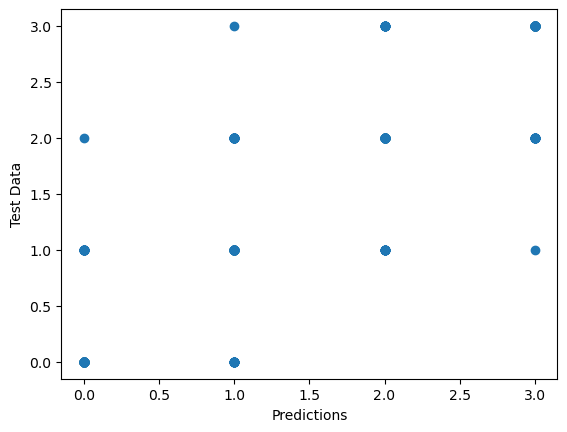

In [79]:
plt.scatter(preds, y_test,)
plt.xlabel('Predictions')
plt.ylabel('Test Data')

Scatter Plot of Predictions vs Test Data

### Using a Multi-Layer Neural Network

In [80]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Calling on the Dataset that was given

In [81]:
dataset = data.values
pd.DataFrame(dataset)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


Converting the values into an array

In [82]:
X = dataset[:,0:20]
Y = dataset[:,20]
pd.DataFrame(Y)

,0
0,1.0
1,2.0
2,2.0
3,2.0
4,1.0
...,...
1995,0.0
1996,2.0
1997,3.0
1998,0.0


Splitting the dataset into X and Y

#### Preprocessing the Dataset

In [83]:
from sklearn.preprocessing import MinMaxScaler
scalerMM = MinMaxScaler()
scalerMM.fit(X)
scalData = pd.DataFrame(scalerMM.transform(X))
pd.DataFrame(scalData)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


Using the MinMaxScaler for preprocessing of the dataset

In [84]:
X_train, X_test, y_train, y_test = train_test_split(scalData, Y, test_size=0.2, random_state=101)

Splitting the dataset

#### Training and Predicting with the Model

In [85]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Importing the relevant packages that are needed

In [86]:
model = Sequential([
    Dense(units=32, input_shape=(20,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

Creating the model

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                672       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 4)                 132       
                                                                 
Total params: 1,860
Trainable params: 1,860
Non-trainable params: 0
_________________________________________________________________


Summary of the model

In [88]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Compiling the model

In [89]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

Shuffling the training dataset to get an effective split for validation

In [90]:
train = model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=30, epochs=150, verbose=2)

Epoch 1/150
48/48 - 5s - loss: 1.4107 - accuracy: 0.2549 - val_loss: 1.4001 - val_accuracy: 0.2750 - 5s/epoch - 103ms/step
Epoch 2/150
48/48 - 0s - loss: 1.4015 - accuracy: 0.2500 - val_loss: 1.3922 - val_accuracy: 0.2688 - 460ms/epoch - 10ms/step
Epoch 3/150
48/48 - 0s - loss: 1.3939 - accuracy: 0.2514 - val_loss: 1.3864 - val_accuracy: 0.3000 - 481ms/epoch - 10ms/step
Epoch 4/150
48/48 - 0s - loss: 1.3872 - accuracy: 0.2632 - val_loss: 1.3812 - val_accuracy: 0.3187 - 484ms/epoch - 10ms/step
Epoch 5/150
48/48 - 1s - loss: 1.3811 - accuracy: 0.2701 - val_loss: 1.3762 - val_accuracy: 0.3187 - 561ms/epoch - 12ms/step
Epoch 6/150
48/48 - 1s - loss: 1.3754 - accuracy: 0.2840 - val_loss: 1.3717 - val_accuracy: 0.3250 - 504ms/epoch - 10ms/step
Epoch 7/150
48/48 - 0s - loss: 1.3698 - accuracy: 0.3014 - val_loss: 1.3670 - val_accuracy: 0.3375 - 455ms/epoch - 9ms/step
Epoch 8/150
48/48 - 0s - loss: 1.3641 - accuracy: 0.3201 - val_loss: 1.3622 - val_accuracy: 0.3187 - 483ms/epoch - 10ms/step
Epo

Epoch 67/150
48/48 - 0s - loss: 0.6437 - accuracy: 0.7861 - val_loss: 0.6706 - val_accuracy: 0.8000 - 482ms/epoch - 10ms/step
Epoch 68/150
48/48 - 0s - loss: 0.6365 - accuracy: 0.7847 - val_loss: 0.6585 - val_accuracy: 0.8125 - 466ms/epoch - 10ms/step
Epoch 69/150
48/48 - 0s - loss: 0.6295 - accuracy: 0.7882 - val_loss: 0.6505 - val_accuracy: 0.8250 - 454ms/epoch - 9ms/step
Epoch 70/150
48/48 - 0s - loss: 0.6233 - accuracy: 0.7965 - val_loss: 0.6475 - val_accuracy: 0.8250 - 450ms/epoch - 9ms/step
Epoch 71/150
48/48 - 0s - loss: 0.6165 - accuracy: 0.7917 - val_loss: 0.6377 - val_accuracy: 0.8188 - 467ms/epoch - 10ms/step
Epoch 72/150
48/48 - 0s - loss: 0.6101 - accuracy: 0.7951 - val_loss: 0.6322 - val_accuracy: 0.8188 - 452ms/epoch - 9ms/step
Epoch 73/150
48/48 - 0s - loss: 0.6041 - accuracy: 0.8021 - val_loss: 0.6273 - val_accuracy: 0.8250 - 465ms/epoch - 10ms/step
Epoch 74/150
48/48 - 0s - loss: 0.5982 - accuracy: 0.8007 - val_loss: 0.6189 - val_accuracy: 0.8438 - 467ms/epoch - 10ms/

48/48 - 0s - loss: 0.3677 - accuracy: 0.8972 - val_loss: 0.3700 - val_accuracy: 0.8875 - 449ms/epoch - 9ms/step
Epoch 133/150
48/48 - 0s - loss: 0.3654 - accuracy: 0.8958 - val_loss: 0.3686 - val_accuracy: 0.9000 - 450ms/epoch - 9ms/step
Epoch 134/150
48/48 - 0s - loss: 0.3631 - accuracy: 0.8944 - val_loss: 0.3653 - val_accuracy: 0.8938 - 466ms/epoch - 10ms/step
Epoch 135/150
48/48 - 0s - loss: 0.3598 - accuracy: 0.8944 - val_loss: 0.3638 - val_accuracy: 0.8938 - 500ms/epoch - 10ms/step
Epoch 136/150
48/48 - 1s - loss: 0.3575 - accuracy: 0.8979 - val_loss: 0.3609 - val_accuracy: 0.9062 - 626ms/epoch - 13ms/step
Epoch 137/150
48/48 - 1s - loss: 0.3550 - accuracy: 0.8979 - val_loss: 0.3574 - val_accuracy: 0.9062 - 570ms/epoch - 12ms/step
Epoch 138/150
48/48 - 1s - loss: 0.3533 - accuracy: 0.9000 - val_loss: 0.3545 - val_accuracy: 0.9062 - 583ms/epoch - 12ms/step
Epoch 139/150
48/48 - 0s - loss: 0.3501 - accuracy: 0.8986 - val_loss: 0.3551 - val_accuracy: 0.9000 - 458ms/epoch - 10ms/step


Training and Validation of the Model using the train dataset

In [91]:
predictions = model.predict(x=X_test, batch_size=30, verbose=0)
for i in predictions:
    print(i)

[0.018812   0.70153844 0.27234206 0.00730751]
[0.02157656 0.543093   0.42186227 0.01346816]
[0.00191784 0.22954813 0.73174644 0.03678758]
[1.0848485e-01 8.4668040e-01 4.4782318e-02 5.2418985e-05]
[3.9351141e-01 5.7472456e-01 3.1489529e-02 2.7448608e-04]
[6.3084379e-02 8.3596182e-01 1.0062267e-01 3.3123966e-04]
[2.8245518e-05 7.1912259e-02 8.2708108e-01 1.0097843e-01]
[3.0029109e-01 6.0996842e-01 8.9374840e-02 3.6564085e-04]
[2.4187200e-01 6.7744040e-01 8.0488995e-02 1.9856334e-04]
[2.0938118e-01 7.2869277e-01 6.1872493e-02 5.3647382e-05]
[9.9474818e-01 5.2381116e-03 1.3699647e-05 1.8944115e-09]
[1.5429580e-01 7.5707984e-01 8.8284090e-02 3.4026476e-04]
[0.01307241 0.6262518  0.34872812 0.01194766]
[4.0051809e-01 5.9030861e-01 9.1693886e-03 3.9072847e-06]
[0.03679714 0.79705286 0.16528748 0.00086251]
[7.3379374e-01 2.6244605e-01 3.7559418e-03 4.2575311e-06]
[6.1212820e-01 3.7742850e-01 1.0435675e-02 7.6254173e-06]
[0.0043324  0.5993217  0.37414157 0.02220425]
[5.3355980e-01 4.4787312e-01

[6.3234737e-11 2.6106061e-05 1.0509728e-02 9.8946416e-01]
[9.9507064e-01 4.9188258e-03 1.0442197e-05 1.6191769e-09]
[0.07244539 0.7796441  0.14694536 0.0009651 ]
[0.02929578 0.67942315 0.28917414 0.00210698]
[9.6247405e-01 3.7110165e-02 4.1544510e-04 3.0297460e-07]
[6.9995702e-05 4.9474914e-02 6.1458802e-01 3.3586702e-01]
[0.02172168 0.682469   0.28961936 0.00619002]
[8.6960948e-01 1.2850760e-01 1.8819541e-03 9.6428710e-07]
[0.00242286 0.31858316 0.5553784  0.12361557]
[2.8893764e-06 7.8785475e-03 3.4434175e-01 6.4777690e-01]
[1.6064182e-07 2.8198014e-03 1.8574803e-01 8.1143200e-01]
[0.01643897 0.58852375 0.3818092  0.01322799]
[0.00066921 0.3062698  0.63759524 0.05546574]
[6.3998627e-08 5.4658297e-04 5.7667371e-02 9.4178593e-01]
[1.975196e-06 9.425259e-03 3.815132e-01 6.090596e-01]
[0.10498177 0.7723272  0.11947302 0.00321812]
[0.00774564 0.49304143 0.4860442  0.01316877]
[5.1110548e-01 4.5250949e-01 3.6228806e-02 1.5607091e-04]
[7.2309293e-02 8.5734850e-01 7.0240863e-02 1.0139105e-04

Set of Predictions showing probability of being each of the possible target values

In [92]:
rounded_predictions = np.argmax(predictions, axis=-1)
for i in rounded_predictions:
    print(i)

1
1
2
1
1
1
2
1
1
1
0
1
1
1
1
0
0
1
0
1
3
1
2
3
2
2
2
2
0
0
2
3
0
0
3
0
0
0
1
1
1
3
3
2
3
0
1
3
3
1
0
0
3
3
3
2
1
3
2
3
2
2
3
1
3
1
0
1
0
2
1
2
3
2
2
3
3
2
0
2
0
0
2
2
2
3
2
1
0
0
3
3
0
2
0
3
2
0
2
3
0
2
3
3
0
3
0
0
2
0
1
0
3
2
2
1
1
3
1
0
3
2
2
3
1
3
3
2
1
1
1
0
0
1
0
2
3
0
2
2
2
3
0
0
0
1
1
3
3
0
2
1
2
2
3
2
2
0
3
2
2
2
2
2
1
2
2
1
3
3
1
2
0
3
2
3
2
3
3
2
1
1
1
1
3
3
1
2
0
3
1
0
2
2
0
2
0
0
3
0
0
1
3
2
1
3
0
2
2
2
2
1
1
3
1
3
1
0
3
1
2
2
3
0
2
3
3
0
3
1
1
1
0
2
1
3
1
2
2
0
1
2
1
3
0
3
3
2
3
3
1
2
1
2
3
1
0
2
0
1
1
3
3
0
1
0
1
2
0
2
3
1
3
2
1
2
2
2
0
3
1
3
1
2
3
2
3
1
2
3
2
3
0
1
1
0
2
1
0
2
3
3
1
2
3
3
1
1
0
1
2
0
0
0
1
1
3
1
3
2
1
3
1
3
1
2
2
0
1
2
2
2
2
1
0
0
2
2
1
1
2
2
3
0
0
2
0
2
3
3
2
2
2
2
0
3
1
0
0
2
0
3
3
1
0
1
0
2
0
0
1
0
0
2
2
2
1
3
2
2
2
1
3
1
0
0
0
0
1
0
3
1
3
1
1
1
3
2
0
2


Rounded Predictions of the Test Dataset

#### Metrics of the Model

In [93]:
print(classification_report(rounded_predictions,y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.89      0.89      0.89       102
           2       0.82      0.87      0.85       114
           3       0.94      0.84      0.89        94

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.89       400



Classification Report of the Results

In [94]:
print(accuracy_score(rounded_predictions,y_test))

0.895


Accuracy of the Model

Text(0, 0.5, 'Test Data')

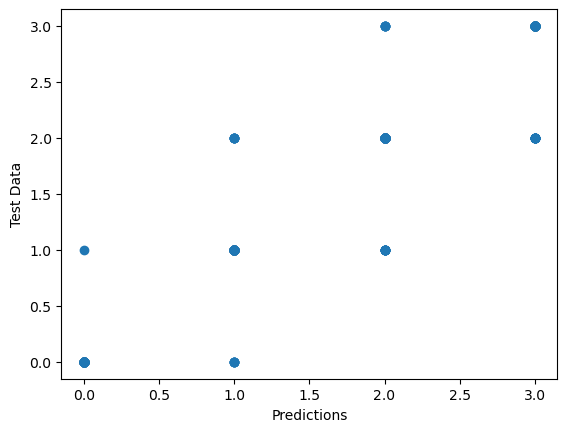

In [95]:
plt.scatter(rounded_predictions, y_test,)
plt.xlabel('Predictions')
plt.ylabel('Test Data')

Scatter Plot of Predictions vs Test Data

### Conclusion

Out of the two models the Multi-Layer Neural Network gave a higher accuracy